In [1]:
import matplotlib.pylab as plt
import numpy as np
from mgemu import emu
import pyccl

In [10]:
def pmg(Om, h, ns, s8, fR0, n, z):
    Omh2 = (h**2)*Om
    pkratio, k = emu(Omh2, ns, s8, fR0, n, z)
    # cosmo = pyccl.Cosmology(Omega_c= Om, Omega_b=0.0, h=h, n_s=ns, sigma8=s8, transfer_function='bbks')
    cosmo = pyccl.Cosmology(Omega_c=Om, Omega_b=0.0223/(h**2), h=h, sigma8=s8, n_s=ns, Neff=3.04, transfer_function='boltzmann_class', matter_power_spectrum='emu')
    a = 1./(1+z)
    pk_nl = pyccl.nonlin_matter_power(cosmo, k, a)
    pk_mg = pk_lcdm*pkratio
    return pk_mg, k

In [11]:
### LCDM parameters
h=0.67 # See README and the accompanying paper regarding the value of h. 
Om = 0.281
Omh2=(h**2)*Om
ns=0.971
s8=0.82
### Hu-Sawicki model parameters
fr0=1e-5
n=1
### Redshift
z=0.0

In [12]:
pkratio, k = emu(Omh2=Omh2, ns=ns, s8=s8, fR0=fr0, n=n, z=z)

/Users/gev866/.local/lib/python3.5/site-packages/gpflow-1.5.1-py3.5.egg/gpflow/saver/serializers.py:46: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  with h5py.File(pathname_or_file_like) as h5file:
/Users/gev866/.local/lib/python3.5/site-packages/gpflow-1.5.1-py3.5.egg/gpflow/saver/serializers.py:47: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  return h5file['data'].value


In [13]:
print (pkratio)

[1.00982889 1.01357217 1.01714141 1.0205421  1.02377975 1.02685985
 1.0297879  1.0325694  1.03520985 1.03771475 1.0400896  1.04233989
 1.04447113 1.04648882 1.04839845 1.05020552 1.05191553 1.05353398
 1.05506638 1.05651821 1.05789498 1.05920218 1.06044532 1.0616299
 1.06276141 1.06384535 1.06474698 1.06567341 1.06669576 1.06759491
 1.06860136 1.06979909 1.07112221 1.07264776 1.0737043  1.07477308
 1.07583323 1.0768346  1.07745653 1.07854727 1.07955811 1.08056651
 1.08155537 1.08238071 1.08337066 1.08407186 1.08508032 1.08628045
 1.08716082 1.08811323 1.08913573 1.09015496 1.09113614 1.09197546
 1.09327543 1.09376119 1.09512835 1.09627433 1.09726162 1.09815755
 1.09938178 1.10056761 1.10164727 1.1022352  1.10348093 1.1044688
 1.10568708 1.10673956 1.1078866  1.10872038 1.1095461  1.11065004
 1.11150012 1.11245044 1.11352418 1.11431218 1.11560441 1.11693727
 1.11817223 1.11926903 1.12054795 1.12179376 1.12293719 1.12396938
 1.12464217 1.12558161 1.12651605 1.12720133 1.1280515  1.129274

In [14]:
# cosmo = pyccl.Cosmology(Omega_c= Om, Omega_b=0.0, h=h, n_s=ns, sigma8=s8, transfer_function='bbks')
cosmo = pyccl.Cosmology(Omega_c=Om, Omega_b=0.0223/(h**2), h=h, sigma8=s8, n_s=ns, Neff=3.04, transfer_function='bbks', matter_power_spectrum='emu')
# pyccl.comoving_radial_distance(cosmo, 1./(1+z))
a = 1./(1+z)
pk_lcdm = pyccl.nonlin_matter_power(cosmo, k, a)

/Users/gev866/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:20: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
/Users/gev866/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:21: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


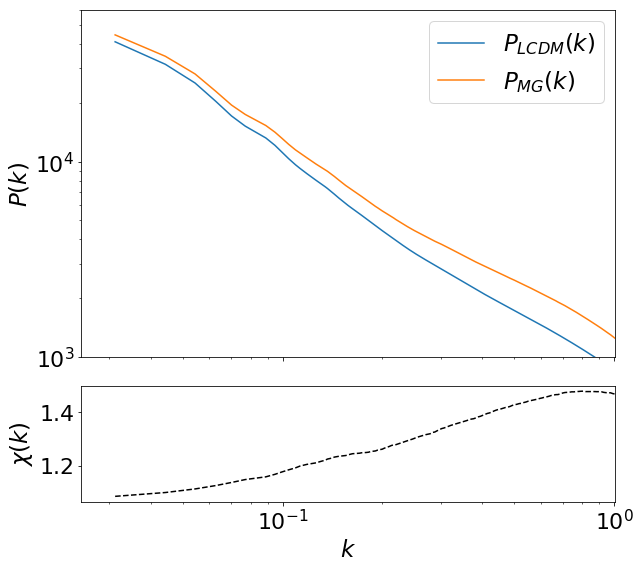

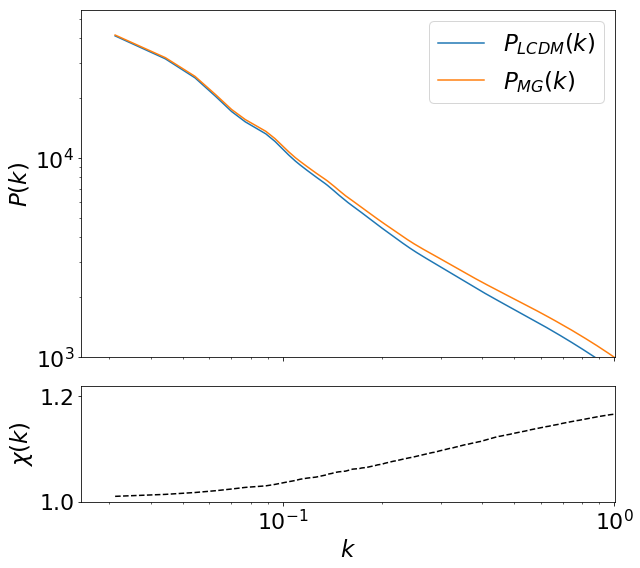

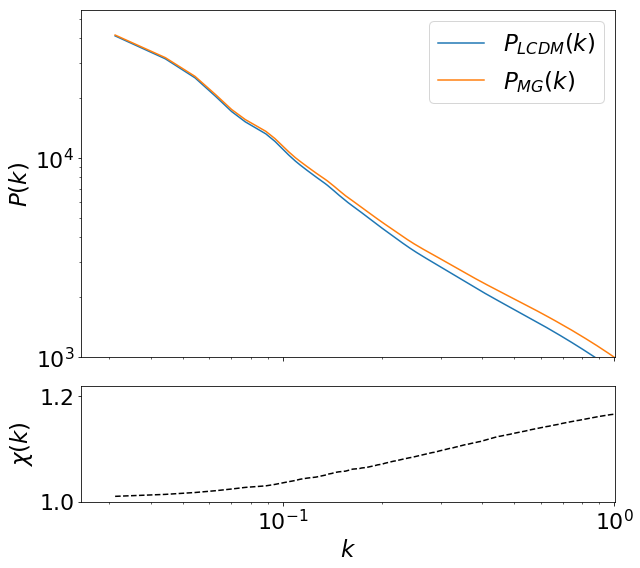

In [16]:
f, a = plt.subplots(2, 1, figsize=(9, 8), gridspec_kw={'height_ratios': [3, 1]}, sharex=True)
a[0].tick_params(axis='both', which='major', labelsize=22)
a[1].tick_params(axis='both', which='major', labelsize=22)


a[0].plot(k, pk_lcdm, label = r'$P_{LCDM}(k)$')
a[0].set_xscale('log')
a[1].set_xscale('log')

a[0].set_yscale('log')
a[0].plot(k, pk_lcdm*pkratio, label = r'$P_{MG}(k)$')
a[0].set_ylabel(r'$P(k)$' , fontsize=23)
a[0].legend(fontsize=23)


a[1].set_xlabel('$k$' , fontsize=23)
a[1].plot(k, pkratio, 'k--', label = r'$P_{MG}(k)/P_{LCDM}(k)$')
a[1].set_ylabel(r'$\chi(k)$' , fontsize=23)

a[0].set_xlim(0, 1.01)
a[1].set_xlim(0, 1.01)
a[0].set_ylim(1e3, )

f.tight_layout()
plt.show()

/Users/gev866/.local/lib/python3.5/site-packages/gpflow-1.5.1-py3.5.egg/gpflow/saver/serializers.py:46: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  with h5py.File(pathname_or_file_like) as h5file:
/Users/gev866/.local/lib/python3.5/site-packages/gpflow-1.5.1-py3.5.egg/gpflow/saver/serializers.py:47: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  return h5file['data'].value
/Users/gev866/anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)


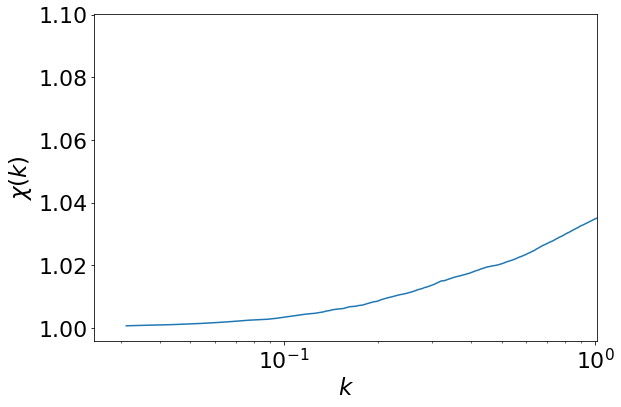

In [19]:
import matplotlib.pylab as plt
import numpy as np

plt.figure(1, figsize=(9, 6) )
plt.tick_params(axis='both', which='major', labelsize=22)

fR0_arr= np.logspace(-6, -4, 10)
#for i in range(10):
#    fR0 = fR0_arr[i]
#    pkratio, k = emu(Omh2=Omh2, ns=ns, s8=s8, fR0=fR0, n=n, z=1.2)
#    plt.plot(k, pkratio)
pkratio, k = emu(Omh2=Omh2, ns=ns, s8=s8, fR0=1e-5, n=n, z=1.2)
plt.plot(k, pkratio)    
plt.xscale('log')
plt.ylabel(r'$\chi(k)$', fontsize=23)
plt.xlabel(r'$k$', fontsize=23)
plt.xlim(0, 1.01)
plt.show()

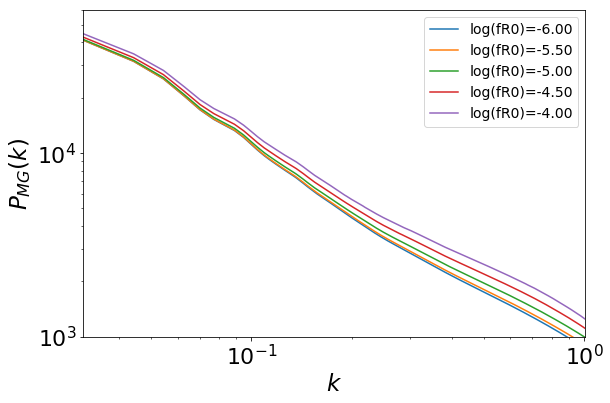

In [75]:

import matplotlib.pylab as plt
import numpy as np

plt.figure(1, figsize=(9, 6) )
plt.tick_params(axis='both', which='major', labelsize=22)
fR0_arr= np.logspace(-6, -4, 5)
for i in range(5):
    fR0 = fR0_arr[i]
    p_mg, k = pmg(Om, h, ns, s8, fR0, n, z)
    plt.plot(k, p_mg, label = "log(fR0)={:.2f}".format(np.log10(fR0)) )
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$P_{MG}(k)$', fontsize=23)
plt.xlabel(r'$k$', fontsize=23)
plt.legend(fontsize=14)
plt.xlim(0, 1.01)
plt.ylim(1e3,)


plt.show()